In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('Summary of Weather.csv')

C:\Users\Saarthak\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


pd.isnull(df).sum()

In [4]:
df=df.dropna(axis=1,how='all')

In [5]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,PGT,TSHDSBRSGF
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN


In [6]:
min_maxTEMP=df[['MaxTemp','MinTemp']]
min_maxTEMP.columns=["Max","Min"]

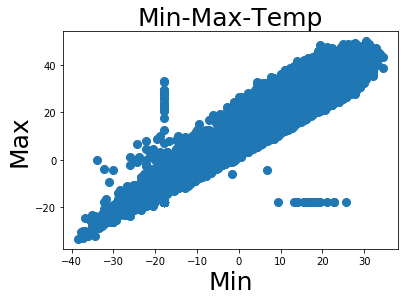

In [7]:
from matplotlib import pyplot as plt

import seaborn as sns
plt.figure(figsize=(6, 4))
plt.scatter(min_maxTEMP["Min"], min_maxTEMP["Max"],s=65)
plt.xlabel('Min',fontsize=25)
plt.ylabel('Max',fontsize=25)
plt.title('Min-Max-Temp',fontsize=25)
plt.show()

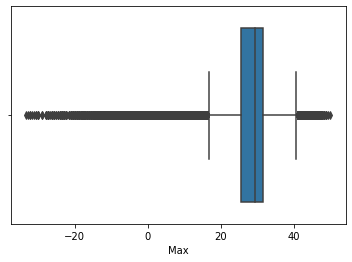

In [8]:
sns.boxplot(x=min_maxTEMP['Max'])

In [9]:
x = min_maxTEMP['Min'].values.reshape(-1,1)
y = min_maxTEMP['Max'].values.reshape(-1,1)
x.shape, y.shape

((119040, 1), (119040, 1))

In [10]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 10,test_size=.25)

In [11]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

from sklearn.metrics import r2_score

In [12]:
lr = LR()

# Fitting the model

lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
train_predict = lr.predict(train_x)
k = mse(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 17.31409828625491


In [14]:
test_predict = lr.predict(test_x)
k = mse(test_predict, test_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 17.50377532226096


In [15]:
r2_score(test_y,test_predict)

0.7702547121033819

In [16]:
test_predict = lr.predict(test_x)

k = mse(test_predict, test_y)
print('Test Mean Absolute Error', k )

Test Mean Absolute Error 17.50377532226096


In [17]:
lr.coef_

array([[0.91862705]])

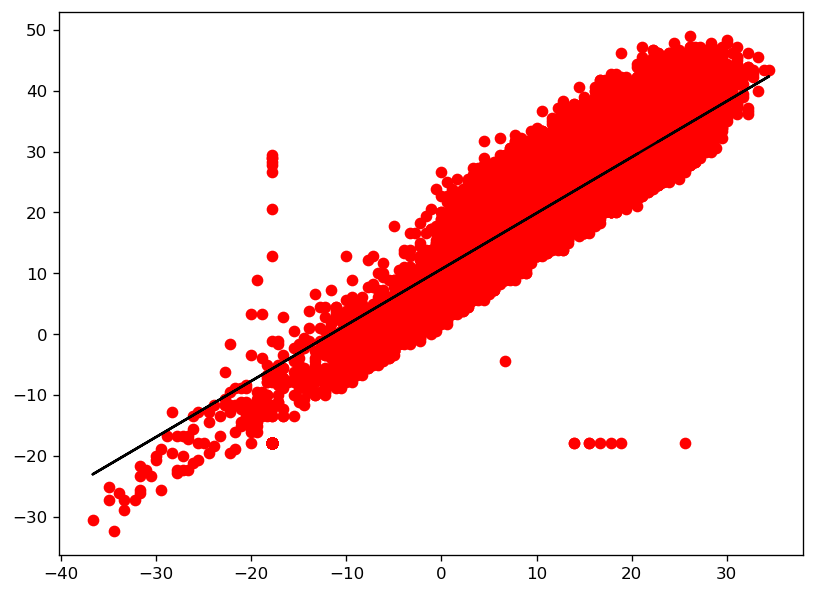

In [18]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(df.columns))
y = lr.coef_
plt.scatter(test_x,test_y, color="red")
plt.plot(test_x,test_predict, color="black")